# SVM - UNSW

In [20]:
cd C:\\Users\\Sharuka Thirimanne\\Desktop\\FYP-ML-IDS

C:\Users\Sharuka Thirimanne\Desktop\FYP-ML-IDS


In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, classification_report, confusion_matrix 

In [22]:
def load_train_dataset():
    df_train = pd.read_csv('USNW_train-set.csv')
    
    limit1 = df_train.shape[1]-1
    
    X_train = df_train.iloc[:,0:limit1]
    Y_train = df_train.iloc[:,limit1]
    
    return  X_train, Y_train,  df_train

X_train, Y_train,  df_train = load_train_dataset()

In [23]:
def load_test_dataset():
    df_test = pd.read_csv('USNW_test-set.csv')
    
    limit2 = df_test.shape[1]-1
    
    X_test = df_test.iloc[:,0:limit2]
    Y_test = df_test.iloc[:,limit2]
    
    return X_test, Y_test,df_test

X_test, Y_test ,df_test = load_test_dataset()

In [24]:
X_train, X_val , Y_train , Y_val = train_test_split(X_train,Y_train, test_size=0.2,stratify = Y_train,
                                                    shuffle=True,random_state=42)

print('Training X   :',X_train.shape)
print('Validation X :',X_val.shape)
print('Test_X       :',X_test.shape)
print('Training_Y   :',Y_train.shape)
print('Validation Y :',Y_val.shape)
print('Test_Y       :',Y_test.shape)

Training X   : (78649, 65)
Validation X : (19663, 65)
Test_X       : (53899, 65)
Training_Y   : (78649,)
Validation Y : (19663,)
Test_Y       : (53899,)


In [37]:
model = SVC(C= 40.5, gamma= 0.801).fit(X_train,Y_train)

In [40]:
model_poly = SVC(C= 27.5, kernel= 'poly',degree=4,gamma=0.901).fit(X_train,Y_train)

In [38]:
print('RBF Kernel')
test_predictions = model.predict(X_test)

print("Cross-Validation set accuracy: {:.6f} %".format((cross_val_score(model, X_val, Y_val, 
                                                                        cv=5,scoring='accuracy').mean())*100))
print("Train set accuracy           : {:.6f} %".format(model.score(X_train,Y_train)*100))
print("Test set accuracy            : {:.6f} %".format(accuracy_score(Y_test, test_predictions)*100))

RBF Kernel
Cross-Validation set accuracy: 90.454108 %
Train set accuracy           : 90.922962 %
Test set accuracy            : 75.186924 %


In [39]:
print("Test set precision : {:.4f}".format(precision_score(Y_test, test_predictions)))
print("Test set recall    : {:.4f}".format(recall_score(Y_test, test_predictions)))
print("Test set F1-score  : {:.4f}".format(f1_score(Y_test, test_predictions)))

Test set precision : 0.5974
Test set recall    : 0.9840
Test set F1-score  : 0.7435


In [41]:
print('Poly Kernel')
test_predictions_poly = model_poly.predict(X_test)

print("Cross-Validation set accuracy: {:.4f} %".format((cross_val_score(model_poly, X_val, Y_val, 
                                                                        cv=3,scoring='accuracy').mean())*100))
print("Train set accuracy           : {:.4f} %".format(model_poly.score(X_train,Y_train)*100))
print("Test set accuracy            : {:.4f} %".format(accuracy_score(Y_test, test_predictions_poly)*100))

Poly Kernel
Cross-Validation set accuracy: 90.8966 %
Train set accuracy           : 91.6871 %
Test set accuracy            : 77.0534 %


In [42]:
print("Test set precision : {:.4f}".format(precision_score(Y_test, test_predictions_poly)))
print("Test set recall    : {:.4f}".format(recall_score(Y_test, test_predictions_poly)))
print("Test set F1-score  : {:.4f}".format(f1_score(Y_test, test_predictions_poly)))

Test set precision : 0.6219
Test set recall    : 0.9488
Test set F1-score  : 0.7513


In [50]:
predictions = [test_predictions,test_predictions_poly]
kernel_names = ['RBF','Poly']

def plot_cm(labels, predictions,kernel_names, p=0.5):
    fig, axs = plt.subplots(nrows = 1,ncols = 2, figsize=(12, 5))
    for i in range(0,2): 
        pred = predictions[i]
        k_names = kernel_names[i]
        cm = confusion_matrix(labels, pred > p, normalize= 'true')
        sns.heatmap(cm, annot=True, fmt=".2f",ax=axs[i])
        axs[i].set(xlabel='Predicted label',ylabel='Actual label',title=str('Confusion matrix @{:.2f}'.format(p))+' '+ str(k_names))
        
        print('True Negatives  : {:.2f}'.format(cm[0][0]))
        print('False Positives : {:.2f}'.format(cm[0][1]))
        print('False Negatives : {:.2f}'.format(cm[1][0]))
        print('True Positives  : {:.2f}'.format(cm[1][1]))

True Negatives  : 0.62
False Positives : 0.38
False Negatives : 0.02
True Positives  : 0.98
True Negatives  : 0.67
False Positives : 0.33
False Negatives : 0.05
True Positives  : 0.95


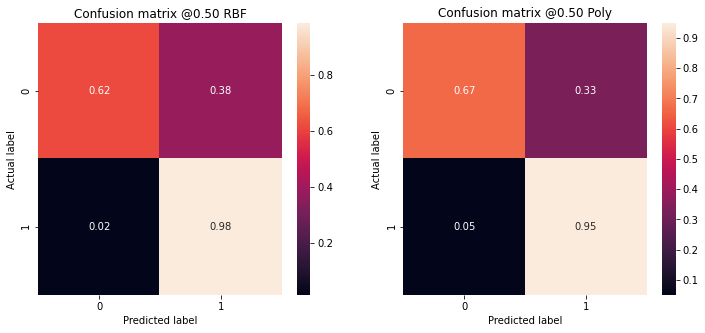

In [51]:
plot_cm(Y_test, predictions,kernel_names)

In [45]:
print('RBF Kernel Classification Report')
print(classification_report(Y_test, test_predictions))
print('\n')
print('Poly Kernel Classification Report')
print(classification_report(Y_test, test_predictions_poly))

RBF Kernel Classification Report
              precision    recall  f1-score   support

           0       0.99      0.62      0.76     34204
           1       0.60      0.98      0.74     19695

    accuracy                           0.75     53899
   macro avg       0.79      0.80      0.75     53899
weighted avg       0.84      0.75      0.75     53899



Poly Kernel Classification Report
              precision    recall  f1-score   support

           0       0.96      0.67      0.79     34204
           1       0.62      0.95      0.75     19695

    accuracy                           0.77     53899
   macro avg       0.79      0.81      0.77     53899
weighted avg       0.84      0.77      0.77     53899



In [34]:
 model.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [35]:
param_grid = {'gamma' : np.arange(0.001,1,0.1).tolist(),
              'C' : np.arange(0.5,50.0,0.5).tolist()}

optimal_params = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    cv=2,
    scoring ='accuracy',
    verbose = 2
)

optimal_params.fit(X_val,Y_val)
print(optimal_params.best_params_)

Fitting 2 folds for each of 990 candidates, totalling 1980 fits
[CV] C=0.5, gamma=0.001 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=0.5, gamma=0.001, total=  14.5s
[CV] C=0.5, gamma=0.001 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.4s remaining:    0.0s


[CV] ............................... C=0.5, gamma=0.001, total=  13.8s
[CV] C=0.5, gamma=0.101 ..............................................
[CV] ............................... C=0.5, gamma=0.101, total=   5.0s
[CV] C=0.5, gamma=0.101 ..............................................
[CV] ............................... C=0.5, gamma=0.101, total=   4.8s
[CV] C=0.5, gamma=0.201 ..............................................
[CV] ............................... C=0.5, gamma=0.201, total=   5.0s
[CV] C=0.5, gamma=0.201 ..............................................
[CV] ............................... C=0.5, gamma=0.201, total=   5.1s
[CV] C=0.5, gamma=0.30100000000000005 ................................
[CV] ................. C=0.5, gamma=0.30100000000000005, total=   5.6s
[CV] C=0.5, gamma=0.30100000000000005 ................................
[CV] ................. C=0.5, gamma=0.30100000000000005, total=   4.9s
[CV] C=0.5, gamma=0.401 ..............................................
[CV] .

[CV] ............................... C=1.5, gamma=0.901, total=   5.1s
[CV] C=2.0, gamma=0.001 ..............................................
[CV] ............................... C=2.0, gamma=0.001, total=   9.3s
[CV] C=2.0, gamma=0.001 ..............................................
[CV] ............................... C=2.0, gamma=0.001, total=   9.1s
[CV] C=2.0, gamma=0.101 ..............................................
[CV] ............................... C=2.0, gamma=0.101, total=   5.3s
[CV] C=2.0, gamma=0.101 ..............................................
[CV] ............................... C=2.0, gamma=0.101, total=   5.3s
[CV] C=2.0, gamma=0.201 ..............................................
[CV] ............................... C=2.0, gamma=0.201, total=   5.3s
[CV] C=2.0, gamma=0.201 ..............................................
[CV] ............................... C=2.0, gamma=0.201, total=   4.8s
[CV] C=2.0, gamma=0.30100000000000005 ................................
[CV] .

[CV] ............................... C=3.0, gamma=0.801, total=   5.8s
[CV] C=3.0, gamma=0.901 ..............................................
[CV] ............................... C=3.0, gamma=0.901, total=   5.1s
[CV] C=3.0, gamma=0.901 ..............................................
[CV] ............................... C=3.0, gamma=0.901, total=   4.9s
[CV] C=3.5, gamma=0.001 ..............................................
[CV] ............................... C=3.5, gamma=0.001, total=   7.9s
[CV] C=3.5, gamma=0.001 ..............................................
[CV] ............................... C=3.5, gamma=0.001, total=   7.6s
[CV] C=3.5, gamma=0.101 ..............................................
[CV] ............................... C=3.5, gamma=0.101, total=   5.0s
[CV] C=3.5, gamma=0.101 ..............................................
[CV] ............................... C=3.5, gamma=0.101, total=   4.8s
[CV] C=3.5, gamma=0.201 ..............................................
[CV] .

[CV] .................. C=4.5, gamma=0.7010000000000001, total=   4.7s
[CV] C=4.5, gamma=0.801 ..............................................
[CV] ............................... C=4.5, gamma=0.801, total=   5.1s
[CV] C=4.5, gamma=0.801 ..............................................
[CV] ............................... C=4.5, gamma=0.801, total=   4.9s
[CV] C=4.5, gamma=0.901 ..............................................
[CV] ............................... C=4.5, gamma=0.901, total=   5.1s
[CV] C=4.5, gamma=0.901 ..............................................
[CV] ............................... C=4.5, gamma=0.901, total=   4.9s
[CV] C=5.0, gamma=0.001 ..............................................
[CV] ............................... C=5.0, gamma=0.001, total=   7.1s
[CV] C=5.0, gamma=0.001 ..............................................
[CV] ............................... C=5.0, gamma=0.001, total=   6.9s
[CV] C=5.0, gamma=0.101 ..............................................
[CV] .

[CV] .................. C=6.0, gamma=0.6010000000000001, total=   5.1s
[CV] C=6.0, gamma=0.7010000000000001 .................................
[CV] .................. C=6.0, gamma=0.7010000000000001, total=   5.7s
[CV] C=6.0, gamma=0.7010000000000001 .................................
[CV] .................. C=6.0, gamma=0.7010000000000001, total=   4.8s
[CV] C=6.0, gamma=0.801 ..............................................
[CV] ............................... C=6.0, gamma=0.801, total=   4.9s
[CV] C=6.0, gamma=0.801 ..............................................
[CV] ............................... C=6.0, gamma=0.801, total=   4.9s
[CV] C=6.0, gamma=0.901 ..............................................
[CV] ............................... C=6.0, gamma=0.901, total=   5.1s
[CV] C=6.0, gamma=0.901 ..............................................
[CV] ............................... C=6.0, gamma=0.901, total=   4.7s
[CV] C=6.5, gamma=0.001 ..............................................
[CV] .

[CV] ............................... C=7.5, gamma=0.501, total=   4.8s
[CV] C=7.5, gamma=0.6010000000000001 .................................
[CV] .................. C=7.5, gamma=0.6010000000000001, total=   4.9s
[CV] C=7.5, gamma=0.6010000000000001 .................................
[CV] .................. C=7.5, gamma=0.6010000000000001, total=   5.2s
[CV] C=7.5, gamma=0.7010000000000001 .................................
[CV] .................. C=7.5, gamma=0.7010000000000001, total=   5.4s
[CV] C=7.5, gamma=0.7010000000000001 .................................
[CV] .................. C=7.5, gamma=0.7010000000000001, total=   4.8s
[CV] C=7.5, gamma=0.801 ..............................................
[CV] ............................... C=7.5, gamma=0.801, total=   5.0s
[CV] C=7.5, gamma=0.801 ..............................................
[CV] ............................... C=7.5, gamma=0.801, total=   4.7s
[CV] C=7.5, gamma=0.901 ..............................................
[CV] .

[CV] ............................... C=9.0, gamma=0.401, total=   4.6s
[CV] C=9.0, gamma=0.501 ..............................................
[CV] ............................... C=9.0, gamma=0.501, total=   4.9s
[CV] C=9.0, gamma=0.501 ..............................................
[CV] ............................... C=9.0, gamma=0.501, total=   4.8s
[CV] C=9.0, gamma=0.6010000000000001 .................................
[CV] .................. C=9.0, gamma=0.6010000000000001, total=   4.9s
[CV] C=9.0, gamma=0.6010000000000001 .................................
[CV] .................. C=9.0, gamma=0.6010000000000001, total=   4.7s
[CV] C=9.0, gamma=0.7010000000000001 .................................
[CV] .................. C=9.0, gamma=0.7010000000000001, total=   5.1s
[CV] C=9.0, gamma=0.7010000000000001 .................................
[CV] .................. C=9.0, gamma=0.7010000000000001, total=   4.9s
[CV] C=9.0, gamma=0.801 ..............................................
[CV] .

[CV] ................ C=10.5, gamma=0.30100000000000005, total=   4.6s
[CV] C=10.5, gamma=0.401 .............................................
[CV] .............................. C=10.5, gamma=0.401, total=   4.8s
[CV] C=10.5, gamma=0.401 .............................................
[CV] .............................. C=10.5, gamma=0.401, total=   4.6s
[CV] C=10.5, gamma=0.501 .............................................
[CV] .............................. C=10.5, gamma=0.501, total=   4.9s
[CV] C=10.5, gamma=0.501 .............................................
[CV] .............................. C=10.5, gamma=0.501, total=   4.9s
[CV] C=10.5, gamma=0.6010000000000001 ................................
[CV] ................. C=10.5, gamma=0.6010000000000001, total=   5.7s
[CV] C=10.5, gamma=0.6010000000000001 ................................
[CV] ................. C=10.5, gamma=0.6010000000000001, total=   4.7s
[CV] C=10.5, gamma=0.7010000000000001 ................................
[CV] .

[CV] .............................. C=12.0, gamma=0.201, total=   4.7s
[CV] C=12.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=12.0, gamma=0.30100000000000005, total=   4.8s
[CV] C=12.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=12.0, gamma=0.30100000000000005, total=   4.7s
[CV] C=12.0, gamma=0.401 .............................................
[CV] .............................. C=12.0, gamma=0.401, total=   4.9s
[CV] C=12.0, gamma=0.401 .............................................
[CV] .............................. C=12.0, gamma=0.401, total=   4.5s
[CV] C=12.0, gamma=0.501 .............................................
[CV] .............................. C=12.0, gamma=0.501, total=   4.8s
[CV] C=12.0, gamma=0.501 .............................................
[CV] .............................. C=12.0, gamma=0.501, total=   4.6s
[CV] C=12.0, gamma=0.6010000000000001 ................................
[CV] .

[CV] .............................. C=13.5, gamma=0.101, total=   4.5s
[CV] C=13.5, gamma=0.201 .............................................
[CV] .............................. C=13.5, gamma=0.201, total=   4.9s
[CV] C=13.5, gamma=0.201 .............................................
[CV] .............................. C=13.5, gamma=0.201, total=   4.6s
[CV] C=13.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=13.5, gamma=0.30100000000000005, total=   4.7s
[CV] C=13.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=13.5, gamma=0.30100000000000005, total=   4.7s
[CV] C=13.5, gamma=0.401 .............................................
[CV] .............................. C=13.5, gamma=0.401, total=   4.8s
[CV] C=13.5, gamma=0.401 .............................................
[CV] .............................. C=13.5, gamma=0.401, total=   4.7s
[CV] C=13.5, gamma=0.501 .............................................
[CV] .

[CV] .............................. C=15.0, gamma=0.001, total=   6.1s
[CV] C=15.0, gamma=0.101 .............................................
[CV] .............................. C=15.0, gamma=0.101, total=   5.0s
[CV] C=15.0, gamma=0.101 .............................................
[CV] .............................. C=15.0, gamma=0.101, total=   4.5s
[CV] C=15.0, gamma=0.201 .............................................
[CV] .............................. C=15.0, gamma=0.201, total=   4.8s
[CV] C=15.0, gamma=0.201 .............................................
[CV] .............................. C=15.0, gamma=0.201, total=   4.5s
[CV] C=15.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=15.0, gamma=0.30100000000000005, total=   4.9s
[CV] C=15.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=15.0, gamma=0.30100000000000005, total=   4.6s
[CV] C=15.0, gamma=0.401 .............................................
[CV] .

[CV] .............................. C=16.0, gamma=0.901, total=   4.9s
[CV] C=16.5, gamma=0.001 .............................................
[CV] .............................. C=16.5, gamma=0.001, total=   5.9s
[CV] C=16.5, gamma=0.001 .............................................
[CV] .............................. C=16.5, gamma=0.001, total=   5.7s
[CV] C=16.5, gamma=0.101 .............................................
[CV] .............................. C=16.5, gamma=0.101, total=   5.0s
[CV] C=16.5, gamma=0.101 .............................................
[CV] .............................. C=16.5, gamma=0.101, total=   4.6s
[CV] C=16.5, gamma=0.201 .............................................
[CV] .............................. C=16.5, gamma=0.201, total=   4.8s
[CV] C=16.5, gamma=0.201 .............................................
[CV] .............................. C=16.5, gamma=0.201, total=   4.7s
[CV] C=16.5, gamma=0.30100000000000005 ...............................
[CV] .

[CV] .............................. C=17.5, gamma=0.801, total=   4.9s
[CV] C=17.5, gamma=0.901 .............................................
[CV] .............................. C=17.5, gamma=0.901, total=   5.1s
[CV] C=17.5, gamma=0.901 .............................................
[CV] .............................. C=17.5, gamma=0.901, total=   5.0s
[CV] C=18.0, gamma=0.001 .............................................
[CV] .............................. C=18.0, gamma=0.001, total=   7.0s
[CV] C=18.0, gamma=0.001 .............................................
[CV] .............................. C=18.0, gamma=0.001, total=   5.9s
[CV] C=18.0, gamma=0.101 .............................................
[CV] .............................. C=18.0, gamma=0.101, total=   5.1s
[CV] C=18.0, gamma=0.101 .............................................
[CV] .............................. C=18.0, gamma=0.101, total=   4.7s
[CV] C=18.0, gamma=0.201 .............................................
[CV] .

[CV] ................. C=19.0, gamma=0.7010000000000001, total=   4.8s
[CV] C=19.0, gamma=0.801 .............................................
[CV] .............................. C=19.0, gamma=0.801, total=   5.2s
[CV] C=19.0, gamma=0.801 .............................................
[CV] .............................. C=19.0, gamma=0.801, total=   4.8s
[CV] C=19.0, gamma=0.901 .............................................
[CV] .............................. C=19.0, gamma=0.901, total=   5.3s
[CV] C=19.0, gamma=0.901 .............................................
[CV] .............................. C=19.0, gamma=0.901, total=   4.9s
[CV] C=19.5, gamma=0.001 .............................................
[CV] .............................. C=19.5, gamma=0.001, total=   5.8s
[CV] C=19.5, gamma=0.001 .............................................
[CV] .............................. C=19.5, gamma=0.001, total=   5.8s
[CV] C=19.5, gamma=0.101 .............................................
[CV] .

[CV] ................. C=20.5, gamma=0.6010000000000001, total=   4.6s
[CV] C=20.5, gamma=0.7010000000000001 ................................
[CV] ................. C=20.5, gamma=0.7010000000000001, total=   5.0s
[CV] C=20.5, gamma=0.7010000000000001 ................................
[CV] ................. C=20.5, gamma=0.7010000000000001, total=   4.7s
[CV] C=20.5, gamma=0.801 .............................................
[CV] .............................. C=20.5, gamma=0.801, total=   5.0s
[CV] C=20.5, gamma=0.801 .............................................
[CV] .............................. C=20.5, gamma=0.801, total=   4.8s
[CV] C=20.5, gamma=0.901 .............................................
[CV] .............................. C=20.5, gamma=0.901, total=   5.2s
[CV] C=20.5, gamma=0.901 .............................................
[CV] .............................. C=20.5, gamma=0.901, total=   5.7s
[CV] C=21.0, gamma=0.001 .............................................
[CV] .

[CV] .............................. C=22.0, gamma=0.501, total=   4.7s
[CV] C=22.0, gamma=0.6010000000000001 ................................
[CV] ................. C=22.0, gamma=0.6010000000000001, total=   5.2s
[CV] C=22.0, gamma=0.6010000000000001 ................................
[CV] ................. C=22.0, gamma=0.6010000000000001, total=   4.9s
[CV] C=22.0, gamma=0.7010000000000001 ................................
[CV] ................. C=22.0, gamma=0.7010000000000001, total=   5.0s
[CV] C=22.0, gamma=0.7010000000000001 ................................
[CV] ................. C=22.0, gamma=0.7010000000000001, total=   4.7s
[CV] C=22.0, gamma=0.801 .............................................
[CV] .............................. C=22.0, gamma=0.801, total=   5.1s
[CV] C=22.0, gamma=0.801 .............................................
[CV] .............................. C=22.0, gamma=0.801, total=   4.8s
[CV] C=22.0, gamma=0.901 .............................................
[CV] .

[CV] .............................. C=23.5, gamma=0.401, total=   4.8s
[CV] C=23.5, gamma=0.501 .............................................
[CV] .............................. C=23.5, gamma=0.501, total=   4.9s
[CV] C=23.5, gamma=0.501 .............................................
[CV] .............................. C=23.5, gamma=0.501, total=   4.9s
[CV] C=23.5, gamma=0.6010000000000001 ................................
[CV] ................. C=23.5, gamma=0.6010000000000001, total=   5.1s
[CV] C=23.5, gamma=0.6010000000000001 ................................
[CV] ................. C=23.5, gamma=0.6010000000000001, total=   4.8s
[CV] C=23.5, gamma=0.7010000000000001 ................................
[CV] ................. C=23.5, gamma=0.7010000000000001, total=   5.0s
[CV] C=23.5, gamma=0.7010000000000001 ................................
[CV] ................. C=23.5, gamma=0.7010000000000001, total=   4.9s
[CV] C=23.5, gamma=0.801 .............................................
[CV] .

[CV] ................ C=25.0, gamma=0.30100000000000005, total=   5.1s
[CV] C=25.0, gamma=0.401 .............................................
[CV] .............................. C=25.0, gamma=0.401, total=   5.0s
[CV] C=25.0, gamma=0.401 .............................................
[CV] .............................. C=25.0, gamma=0.401, total=   5.6s
[CV] C=25.0, gamma=0.501 .............................................
[CV] .............................. C=25.0, gamma=0.501, total=   5.7s
[CV] C=25.0, gamma=0.501 .............................................
[CV] .............................. C=25.0, gamma=0.501, total=   5.0s
[CV] C=25.0, gamma=0.6010000000000001 ................................
[CV] ................. C=25.0, gamma=0.6010000000000001, total=   5.2s
[CV] C=25.0, gamma=0.6010000000000001 ................................
[CV] ................. C=25.0, gamma=0.6010000000000001, total=   5.1s
[CV] C=25.0, gamma=0.7010000000000001 ................................
[CV] .

[CV] .............................. C=26.5, gamma=0.201, total=   4.9s
[CV] C=26.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=26.5, gamma=0.30100000000000005, total=   5.0s
[CV] C=26.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=26.5, gamma=0.30100000000000005, total=   4.9s
[CV] C=26.5, gamma=0.401 .............................................
[CV] .............................. C=26.5, gamma=0.401, total=   5.0s
[CV] C=26.5, gamma=0.401 .............................................
[CV] .............................. C=26.5, gamma=0.401, total=   4.7s
[CV] C=26.5, gamma=0.501 .............................................
[CV] .............................. C=26.5, gamma=0.501, total=   5.1s
[CV] C=26.5, gamma=0.501 .............................................
[CV] .............................. C=26.5, gamma=0.501, total=   4.8s
[CV] C=26.5, gamma=0.6010000000000001 ................................
[CV] .

[CV] .............................. C=28.0, gamma=0.101, total=   4.6s
[CV] C=28.0, gamma=0.201 .............................................
[CV] .............................. C=28.0, gamma=0.201, total=   4.9s
[CV] C=28.0, gamma=0.201 .............................................
[CV] .............................. C=28.0, gamma=0.201, total=   4.7s
[CV] C=28.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=28.0, gamma=0.30100000000000005, total=   5.0s
[CV] C=28.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=28.0, gamma=0.30100000000000005, total=   4.7s
[CV] C=28.0, gamma=0.401 .............................................
[CV] .............................. C=28.0, gamma=0.401, total=   5.8s
[CV] C=28.0, gamma=0.401 .............................................
[CV] .............................. C=28.0, gamma=0.401, total=   5.1s
[CV] C=28.0, gamma=0.501 .............................................
[CV] .

[CV] .............................. C=29.5, gamma=0.001, total=   5.2s
[CV] C=29.5, gamma=0.101 .............................................
[CV] .............................. C=29.5, gamma=0.101, total=   5.3s
[CV] C=29.5, gamma=0.101 .............................................
[CV] .............................. C=29.5, gamma=0.101, total=   5.0s
[CV] C=29.5, gamma=0.201 .............................................
[CV] .............................. C=29.5, gamma=0.201, total=   5.0s
[CV] C=29.5, gamma=0.201 .............................................
[CV] .............................. C=29.5, gamma=0.201, total=   4.8s
[CV] C=29.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=29.5, gamma=0.30100000000000005, total=   5.1s
[CV] C=29.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=29.5, gamma=0.30100000000000005, total=   4.7s
[CV] C=29.5, gamma=0.401 .............................................
[CV] .

[CV] .............................. C=30.5, gamma=0.901, total=   6.3s
[CV] C=31.0, gamma=0.001 .............................................
[CV] .............................. C=31.0, gamma=0.001, total=   7.0s
[CV] C=31.0, gamma=0.001 .............................................
[CV] .............................. C=31.0, gamma=0.001, total=   7.0s
[CV] C=31.0, gamma=0.101 .............................................
[CV] .............................. C=31.0, gamma=0.101, total=   6.7s
[CV] C=31.0, gamma=0.101 .............................................
[CV] .............................. C=31.0, gamma=0.101, total=   6.0s
[CV] C=31.0, gamma=0.201 .............................................
[CV] .............................. C=31.0, gamma=0.201, total=   5.5s
[CV] C=31.0, gamma=0.201 .............................................
[CV] .............................. C=31.0, gamma=0.201, total=   6.9s
[CV] C=31.0, gamma=0.30100000000000005 ...............................
[CV] .

[CV] .............................. C=32.0, gamma=0.801, total=   6.1s
[CV] C=32.0, gamma=0.901 .............................................
[CV] .............................. C=32.0, gamma=0.901, total=   6.5s
[CV] C=32.0, gamma=0.901 .............................................
[CV] .............................. C=32.0, gamma=0.901, total=   6.1s
[CV] C=32.5, gamma=0.001 .............................................
[CV] .............................. C=32.5, gamma=0.001, total=   7.0s
[CV] C=32.5, gamma=0.001 .............................................
[CV] .............................. C=32.5, gamma=0.001, total=   6.6s
[CV] C=32.5, gamma=0.101 .............................................
[CV] .............................. C=32.5, gamma=0.101, total=   6.1s
[CV] C=32.5, gamma=0.101 .............................................
[CV] .............................. C=32.5, gamma=0.101, total=   5.9s
[CV] C=32.5, gamma=0.201 .............................................
[CV] .

[CV] ................. C=33.5, gamma=0.7010000000000001, total=   5.9s
[CV] C=33.5, gamma=0.801 .............................................
[CV] .............................. C=33.5, gamma=0.801, total=   6.4s
[CV] C=33.5, gamma=0.801 .............................................
[CV] .............................. C=33.5, gamma=0.801, total=   6.1s
[CV] C=33.5, gamma=0.901 .............................................
[CV] .............................. C=33.5, gamma=0.901, total=   6.6s
[CV] C=33.5, gamma=0.901 .............................................
[CV] .............................. C=33.5, gamma=0.901, total=   6.2s
[CV] C=34.0, gamma=0.001 .............................................
[CV] .............................. C=34.0, gamma=0.001, total=   7.0s
[CV] C=34.0, gamma=0.001 .............................................
[CV] .............................. C=34.0, gamma=0.001, total=   6.6s
[CV] C=34.0, gamma=0.101 .............................................
[CV] .

[CV] ................. C=35.0, gamma=0.6010000000000001, total=   6.1s
[CV] C=35.0, gamma=0.7010000000000001 ................................
[CV] ................. C=35.0, gamma=0.7010000000000001, total=   5.3s
[CV] C=35.0, gamma=0.7010000000000001 ................................
[CV] ................. C=35.0, gamma=0.7010000000000001, total=   5.1s
[CV] C=35.0, gamma=0.801 .............................................
[CV] .............................. C=35.0, gamma=0.801, total=   5.3s
[CV] C=35.0, gamma=0.801 .............................................
[CV] .............................. C=35.0, gamma=0.801, total=   5.0s
[CV] C=35.0, gamma=0.901 .............................................
[CV] .............................. C=35.0, gamma=0.901, total=   5.6s
[CV] C=35.0, gamma=0.901 .............................................
[CV] .............................. C=35.0, gamma=0.901, total=   5.4s
[CV] C=35.5, gamma=0.001 .............................................
[CV] .

[CV] .............................. C=36.5, gamma=0.501, total=   4.8s
[CV] C=36.5, gamma=0.6010000000000001 ................................
[CV] ................. C=36.5, gamma=0.6010000000000001, total=   5.2s
[CV] C=36.5, gamma=0.6010000000000001 ................................
[CV] ................. C=36.5, gamma=0.6010000000000001, total=   4.9s
[CV] C=36.5, gamma=0.7010000000000001 ................................
[CV] ................. C=36.5, gamma=0.7010000000000001, total=   5.4s
[CV] C=36.5, gamma=0.7010000000000001 ................................
[CV] ................. C=36.5, gamma=0.7010000000000001, total=   5.0s
[CV] C=36.5, gamma=0.801 .............................................
[CV] .............................. C=36.5, gamma=0.801, total=   5.4s
[CV] C=36.5, gamma=0.801 .............................................
[CV] .............................. C=36.5, gamma=0.801, total=   5.0s
[CV] C=36.5, gamma=0.901 .............................................
[CV] .

[CV] .............................. C=38.0, gamma=0.401, total=   4.9s
[CV] C=38.0, gamma=0.501 .............................................
[CV] .............................. C=38.0, gamma=0.501, total=   5.2s
[CV] C=38.0, gamma=0.501 .............................................
[CV] .............................. C=38.0, gamma=0.501, total=   4.8s
[CV] C=38.0, gamma=0.6010000000000001 ................................
[CV] ................. C=38.0, gamma=0.6010000000000001, total=   5.2s
[CV] C=38.0, gamma=0.6010000000000001 ................................
[CV] ................. C=38.0, gamma=0.6010000000000001, total=   5.0s
[CV] C=38.0, gamma=0.7010000000000001 ................................
[CV] ................. C=38.0, gamma=0.7010000000000001, total=   5.4s
[CV] C=38.0, gamma=0.7010000000000001 ................................
[CV] ................. C=38.0, gamma=0.7010000000000001, total=   5.0s
[CV] C=38.0, gamma=0.801 .............................................
[CV] .

[CV] ................ C=39.5, gamma=0.30100000000000005, total=   4.9s
[CV] C=39.5, gamma=0.401 .............................................
[CV] .............................. C=39.5, gamma=0.401, total=   5.2s
[CV] C=39.5, gamma=0.401 .............................................
[CV] .............................. C=39.5, gamma=0.401, total=   4.9s
[CV] C=39.5, gamma=0.501 .............................................
[CV] .............................. C=39.5, gamma=0.501, total=   5.4s
[CV] C=39.5, gamma=0.501 .............................................
[CV] .............................. C=39.5, gamma=0.501, total=   5.2s
[CV] C=39.5, gamma=0.6010000000000001 ................................
[CV] ................. C=39.5, gamma=0.6010000000000001, total=   5.4s
[CV] C=39.5, gamma=0.6010000000000001 ................................
[CV] ................. C=39.5, gamma=0.6010000000000001, total=   4.7s
[CV] C=39.5, gamma=0.7010000000000001 ................................
[CV] .

[CV] .............................. C=41.0, gamma=0.201, total=   4.6s
[CV] C=41.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=41.0, gamma=0.30100000000000005, total=   4.9s
[CV] C=41.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=41.0, gamma=0.30100000000000005, total=   4.7s
[CV] C=41.0, gamma=0.401 .............................................
[CV] .............................. C=41.0, gamma=0.401, total=   5.2s
[CV] C=41.0, gamma=0.401 .............................................
[CV] .............................. C=41.0, gamma=0.401, total=   4.9s
[CV] C=41.0, gamma=0.501 .............................................
[CV] .............................. C=41.0, gamma=0.501, total=   5.2s
[CV] C=41.0, gamma=0.501 .............................................
[CV] .............................. C=41.0, gamma=0.501, total=   4.7s
[CV] C=41.0, gamma=0.6010000000000001 ................................
[CV] .

[CV] .............................. C=42.5, gamma=0.101, total=   4.8s
[CV] C=42.5, gamma=0.201 .............................................
[CV] .............................. C=42.5, gamma=0.201, total=   4.9s
[CV] C=42.5, gamma=0.201 .............................................
[CV] .............................. C=42.5, gamma=0.201, total=   4.8s
[CV] C=42.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=42.5, gamma=0.30100000000000005, total=   5.0s
[CV] C=42.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=42.5, gamma=0.30100000000000005, total=   4.8s
[CV] C=42.5, gamma=0.401 .............................................
[CV] .............................. C=42.5, gamma=0.401, total=   5.2s
[CV] C=42.5, gamma=0.401 .............................................
[CV] .............................. C=42.5, gamma=0.401, total=   4.6s
[CV] C=42.5, gamma=0.501 .............................................
[CV] .

[CV] .............................. C=44.0, gamma=0.001, total=   5.7s
[CV] C=44.0, gamma=0.101 .............................................
[CV] .............................. C=44.0, gamma=0.101, total=   5.1s
[CV] C=44.0, gamma=0.101 .............................................
[CV] .............................. C=44.0, gamma=0.101, total=   4.7s
[CV] C=44.0, gamma=0.201 .............................................
[CV] .............................. C=44.0, gamma=0.201, total=   5.0s
[CV] C=44.0, gamma=0.201 .............................................
[CV] .............................. C=44.0, gamma=0.201, total=   4.8s
[CV] C=44.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=44.0, gamma=0.30100000000000005, total=   5.1s
[CV] C=44.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=44.0, gamma=0.30100000000000005, total=   4.7s
[CV] C=44.0, gamma=0.401 .............................................
[CV] .

[CV] .............................. C=45.0, gamma=0.901, total=   5.3s
[CV] C=45.5, gamma=0.001 .............................................
[CV] .............................. C=45.5, gamma=0.001, total=   5.6s
[CV] C=45.5, gamma=0.001 .............................................
[CV] .............................. C=45.5, gamma=0.001, total=   5.4s
[CV] C=45.5, gamma=0.101 .............................................
[CV] .............................. C=45.5, gamma=0.101, total=   5.1s
[CV] C=45.5, gamma=0.101 .............................................
[CV] .............................. C=45.5, gamma=0.101, total=   4.7s
[CV] C=45.5, gamma=0.201 .............................................
[CV] .............................. C=45.5, gamma=0.201, total=   5.0s
[CV] C=45.5, gamma=0.201 .............................................
[CV] .............................. C=45.5, gamma=0.201, total=   4.8s
[CV] C=45.5, gamma=0.30100000000000005 ...............................
[CV] .

[CV] .............................. C=46.5, gamma=0.801, total=   5.1s
[CV] C=46.5, gamma=0.901 .............................................
[CV] .............................. C=46.5, gamma=0.901, total=   5.6s
[CV] C=46.5, gamma=0.901 .............................................
[CV] .............................. C=46.5, gamma=0.901, total=   5.0s
[CV] C=47.0, gamma=0.001 .............................................
[CV] .............................. C=47.0, gamma=0.001, total=   5.7s
[CV] C=47.0, gamma=0.001 .............................................
[CV] .............................. C=47.0, gamma=0.001, total=   5.5s
[CV] C=47.0, gamma=0.101 .............................................
[CV] .............................. C=47.0, gamma=0.101, total=   5.0s
[CV] C=47.0, gamma=0.101 .............................................
[CV] .............................. C=47.0, gamma=0.101, total=   4.8s
[CV] C=47.0, gamma=0.201 .............................................
[CV] .

[CV] ................. C=48.0, gamma=0.7010000000000001, total=   4.9s
[CV] C=48.0, gamma=0.801 .............................................
[CV] .............................. C=48.0, gamma=0.801, total=   5.4s
[CV] C=48.0, gamma=0.801 .............................................
[CV] .............................. C=48.0, gamma=0.801, total=   5.0s
[CV] C=48.0, gamma=0.901 .............................................
[CV] .............................. C=48.0, gamma=0.901, total=   5.5s
[CV] C=48.0, gamma=0.901 .............................................
[CV] .............................. C=48.0, gamma=0.901, total=   4.9s
[CV] C=48.5, gamma=0.001 .............................................
[CV] .............................. C=48.5, gamma=0.001, total=   5.5s
[CV] C=48.5, gamma=0.001 .............................................
[CV] .............................. C=48.5, gamma=0.001, total=   5.4s
[CV] C=48.5, gamma=0.101 .............................................
[CV] .

[CV] ................. C=49.5, gamma=0.6010000000000001, total=   5.1s
[CV] C=49.5, gamma=0.7010000000000001 ................................
[CV] ................. C=49.5, gamma=0.7010000000000001, total=   5.4s
[CV] C=49.5, gamma=0.7010000000000001 ................................
[CV] ................. C=49.5, gamma=0.7010000000000001, total=   5.0s
[CV] C=49.5, gamma=0.801 .............................................
[CV] .............................. C=49.5, gamma=0.801, total=   5.5s
[CV] C=49.5, gamma=0.801 .............................................
[CV] .............................. C=49.5, gamma=0.801, total=   4.9s
[CV] C=49.5, gamma=0.901 .............................................
[CV] .............................. C=49.5, gamma=0.901, total=   5.5s
[CV] C=49.5, gamma=0.901 .............................................
[CV] .............................. C=49.5, gamma=0.901, total=   5.1s


[Parallel(n_jobs=1)]: Done 1980 out of 1980 | elapsed: 173.6min finished


{'C': 40.5, 'gamma': 0.801}


In [36]:
param_grid = {'gamma' : np.arange(0.001,1,0.1).tolist(),
              'C' : np.arange(0.5,50.0,0.5).tolist()}

optimal_params = GridSearchCV(
    estimator = model_poly,
    param_grid = param_grid,
    scoring ='accuracy',
    cv=2,
    verbose = 2
)

optimal_params.fit(X_val,Y_val)
print(optimal_params.best_params_)

Fitting 2 folds for each of 990 candidates, totalling 1980 fits
[CV] C=0.5, gamma=0.001 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=0.5, gamma=0.001, total=  15.5s
[CV] C=0.5, gamma=0.001 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.4s remaining:    0.0s


[CV] ............................... C=0.5, gamma=0.001, total=  15.5s
[CV] C=0.5, gamma=0.101 ..............................................
[CV] ............................... C=0.5, gamma=0.101, total=   4.8s
[CV] C=0.5, gamma=0.101 ..............................................
[CV] ............................... C=0.5, gamma=0.101, total=   4.7s
[CV] C=0.5, gamma=0.201 ..............................................
[CV] ............................... C=0.5, gamma=0.201, total=   4.2s
[CV] C=0.5, gamma=0.201 ..............................................
[CV] ............................... C=0.5, gamma=0.201, total=   3.9s
[CV] C=0.5, gamma=0.30100000000000005 ................................
[CV] ................. C=0.5, gamma=0.30100000000000005, total=   4.1s
[CV] C=0.5, gamma=0.30100000000000005 ................................
[CV] ................. C=0.5, gamma=0.30100000000000005, total=   3.9s
[CV] C=0.5, gamma=0.401 ..............................................
[CV] .

[CV] ............................... C=1.5, gamma=0.901, total=   9.9s
[CV] C=2.0, gamma=0.001 ..............................................
[CV] ............................... C=2.0, gamma=0.001, total=  15.5s
[CV] C=2.0, gamma=0.001 ..............................................
[CV] ............................... C=2.0, gamma=0.001, total=  15.4s
[CV] C=2.0, gamma=0.101 ..............................................
[CV] ............................... C=2.0, gamma=0.101, total=   4.3s
[CV] C=2.0, gamma=0.101 ..............................................
[CV] ............................... C=2.0, gamma=0.101, total=   4.3s
[CV] C=2.0, gamma=0.201 ..............................................
[CV] ............................... C=2.0, gamma=0.201, total=   4.8s
[CV] C=2.0, gamma=0.201 ..............................................
[CV] ............................... C=2.0, gamma=0.201, total=   3.9s
[CV] C=2.0, gamma=0.30100000000000005 ................................
[CV] .

[CV] ............................... C=3.0, gamma=0.801, total=   9.4s
[CV] C=3.0, gamma=0.901 ..............................................
[CV] ............................... C=3.0, gamma=0.901, total=  14.5s
[CV] C=3.0, gamma=0.901 ..............................................
[CV] ............................... C=3.0, gamma=0.901, total=  13.5s
[CV] C=3.5, gamma=0.001 ..............................................
[CV] ............................... C=3.5, gamma=0.001, total=  16.2s
[CV] C=3.5, gamma=0.001 ..............................................
[CV] ............................... C=3.5, gamma=0.001, total=  16.1s
[CV] C=3.5, gamma=0.101 ..............................................
[CV] ............................... C=3.5, gamma=0.101, total=   4.3s
[CV] C=3.5, gamma=0.101 ..............................................
[CV] ............................... C=3.5, gamma=0.101, total=   4.1s
[CV] C=3.5, gamma=0.201 ..............................................
[CV] .

[CV] .................. C=4.5, gamma=0.7010000000000001, total=   9.2s
[CV] C=4.5, gamma=0.801 ..............................................
[CV] ............................... C=4.5, gamma=0.801, total=  13.5s
[CV] C=4.5, gamma=0.801 ..............................................
[CV] ............................... C=4.5, gamma=0.801, total=  13.3s
[CV] C=4.5, gamma=0.901 ..............................................
[CV] ............................... C=4.5, gamma=0.901, total=  18.3s
[CV] C=4.5, gamma=0.901 ..............................................
[CV] ............................... C=4.5, gamma=0.901, total=  17.3s
[CV] C=5.0, gamma=0.001 ..............................................
[CV] ............................... C=5.0, gamma=0.001, total=  15.5s
[CV] C=5.0, gamma=0.001 ..............................................
[CV] ............................... C=5.0, gamma=0.001, total=  16.3s
[CV] C=5.0, gamma=0.101 ..............................................
[CV] .

[CV] .................. C=6.0, gamma=0.6010000000000001, total=   8.2s
[CV] C=6.0, gamma=0.7010000000000001 .................................
[CV] .................. C=6.0, gamma=0.7010000000000001, total=  12.9s
[CV] C=6.0, gamma=0.7010000000000001 .................................
[CV] .................. C=6.0, gamma=0.7010000000000001, total=  11.3s
[CV] C=6.0, gamma=0.801 ..............................................
[CV] ............................... C=6.0, gamma=0.801, total=  17.4s
[CV] C=6.0, gamma=0.801 ..............................................
[CV] ............................... C=6.0, gamma=0.801, total=  15.2s
[CV] C=6.0, gamma=0.901 ..............................................
[CV] ............................... C=6.0, gamma=0.901, total=  21.4s
[CV] C=6.0, gamma=0.901 ..............................................
[CV] ............................... C=6.0, gamma=0.901, total=  20.5s
[CV] C=6.5, gamma=0.001 ..............................................
[CV] .

[CV] ............................... C=7.5, gamma=0.501, total=   6.7s
[CV] C=7.5, gamma=0.6010000000000001 .................................
[CV] .................. C=7.5, gamma=0.6010000000000001, total=   9.9s
[CV] C=7.5, gamma=0.6010000000000001 .................................
[CV] .................. C=7.5, gamma=0.6010000000000001, total=   9.6s
[CV] C=7.5, gamma=0.7010000000000001 .................................
[CV] .................. C=7.5, gamma=0.7010000000000001, total=  13.6s
[CV] C=7.5, gamma=0.7010000000000001 .................................
[CV] .................. C=7.5, gamma=0.7010000000000001, total=  14.6s
[CV] C=7.5, gamma=0.801 ..............................................
[CV] ............................... C=7.5, gamma=0.801, total=  19.5s
[CV] C=7.5, gamma=0.801 ..............................................
[CV] ............................... C=7.5, gamma=0.801, total=  18.1s
[CV] C=7.5, gamma=0.901 ..............................................
[CV] .

[CV] ............................... C=9.0, gamma=0.401, total=   6.6s
[CV] C=9.0, gamma=0.501 ..............................................
[CV] ............................... C=9.0, gamma=0.501, total=   8.5s
[CV] C=9.0, gamma=0.501 ..............................................
[CV] ............................... C=9.0, gamma=0.501, total=   7.9s
[CV] C=9.0, gamma=0.6010000000000001 .................................
[CV] .................. C=9.0, gamma=0.6010000000000001, total=  11.5s
[CV] C=9.0, gamma=0.6010000000000001 .................................
[CV] .................. C=9.0, gamma=0.6010000000000001, total=   9.3s
[CV] C=9.0, gamma=0.7010000000000001 .................................
[CV] .................. C=9.0, gamma=0.7010000000000001, total=  15.1s
[CV] C=9.0, gamma=0.7010000000000001 .................................
[CV] .................. C=9.0, gamma=0.7010000000000001, total=  12.8s
[CV] C=9.0, gamma=0.801 ..............................................
[CV] .

[CV] ................ C=10.5, gamma=0.30100000000000005, total=   4.6s
[CV] C=10.5, gamma=0.401 .............................................
[CV] .............................. C=10.5, gamma=0.401, total=   6.2s
[CV] C=10.5, gamma=0.401 .............................................
[CV] .............................. C=10.5, gamma=0.401, total=   5.8s
[CV] C=10.5, gamma=0.501 .............................................
[CV] .............................. C=10.5, gamma=0.501, total=  10.1s
[CV] C=10.5, gamma=0.501 .............................................
[CV] .............................. C=10.5, gamma=0.501, total=   8.0s
[CV] C=10.5, gamma=0.6010000000000001 ................................
[CV] ................. C=10.5, gamma=0.6010000000000001, total=  11.9s
[CV] C=10.5, gamma=0.6010000000000001 ................................
[CV] ................. C=10.5, gamma=0.6010000000000001, total=  11.1s
[CV] C=10.5, gamma=0.7010000000000001 ................................
[CV] .

[CV] .............................. C=12.0, gamma=0.201, total=   4.1s
[CV] C=12.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=12.0, gamma=0.30100000000000005, total=   5.1s
[CV] C=12.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=12.0, gamma=0.30100000000000005, total=   4.7s
[CV] C=12.0, gamma=0.401 .............................................
[CV] .............................. C=12.0, gamma=0.401, total=   6.7s
[CV] C=12.0, gamma=0.401 .............................................
[CV] .............................. C=12.0, gamma=0.401, total=   6.4s
[CV] C=12.0, gamma=0.501 .............................................
[CV] .............................. C=12.0, gamma=0.501, total=   9.2s
[CV] C=12.0, gamma=0.501 .............................................
[CV] .............................. C=12.0, gamma=0.501, total=   8.2s
[CV] C=12.0, gamma=0.6010000000000001 ................................
[CV] .

[CV] .............................. C=13.5, gamma=0.101, total=   4.0s
[CV] C=13.5, gamma=0.201 .............................................
[CV] .............................. C=13.5, gamma=0.201, total=   4.2s
[CV] C=13.5, gamma=0.201 .............................................
[CV] .............................. C=13.5, gamma=0.201, total=   4.0s
[CV] C=13.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=13.5, gamma=0.30100000000000005, total=   4.9s
[CV] C=13.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=13.5, gamma=0.30100000000000005, total=   4.8s
[CV] C=13.5, gamma=0.401 .............................................
[CV] .............................. C=13.5, gamma=0.401, total=   6.3s
[CV] C=13.5, gamma=0.401 .............................................
[CV] .............................. C=13.5, gamma=0.401, total=   6.3s
[CV] C=13.5, gamma=0.501 .............................................
[CV] .

[CV] .............................. C=15.0, gamma=0.001, total=  15.3s
[CV] C=15.0, gamma=0.101 .............................................
[CV] .............................. C=15.0, gamma=0.101, total=   4.4s
[CV] C=15.0, gamma=0.101 .............................................
[CV] .............................. C=15.0, gamma=0.101, total=   3.9s
[CV] C=15.0, gamma=0.201 .............................................
[CV] .............................. C=15.0, gamma=0.201, total=   4.4s
[CV] C=15.0, gamma=0.201 .............................................
[CV] .............................. C=15.0, gamma=0.201, total=   4.1s
[CV] C=15.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=15.0, gamma=0.30100000000000005, total=   5.2s
[CV] C=15.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=15.0, gamma=0.30100000000000005, total=   4.8s
[CV] C=15.0, gamma=0.401 .............................................
[CV] .

[CV] .............................. C=16.0, gamma=0.901, total=  42.3s
[CV] C=16.5, gamma=0.001 .............................................
[CV] .............................. C=16.5, gamma=0.001, total=  15.3s
[CV] C=16.5, gamma=0.001 .............................................
[CV] .............................. C=16.5, gamma=0.001, total=  16.3s
[CV] C=16.5, gamma=0.101 .............................................
[CV] .............................. C=16.5, gamma=0.101, total=   4.3s
[CV] C=16.5, gamma=0.101 .............................................
[CV] .............................. C=16.5, gamma=0.101, total=   4.0s
[CV] C=16.5, gamma=0.201 .............................................
[CV] .............................. C=16.5, gamma=0.201, total=   4.6s
[CV] C=16.5, gamma=0.201 .............................................
[CV] .............................. C=16.5, gamma=0.201, total=   4.1s
[CV] C=16.5, gamma=0.30100000000000005 ...............................
[CV] .

[CV] .............................. C=17.5, gamma=0.801, total=  30.9s
[CV] C=17.5, gamma=0.901 .............................................
[CV] .............................. C=17.5, gamma=0.901, total=  39.8s
[CV] C=17.5, gamma=0.901 .............................................
[CV] .............................. C=17.5, gamma=0.901, total=  39.1s
[CV] C=18.0, gamma=0.001 .............................................
[CV] .............................. C=18.0, gamma=0.001, total=  15.3s
[CV] C=18.0, gamma=0.001 .............................................
[CV] .............................. C=18.0, gamma=0.001, total=  15.2s
[CV] C=18.0, gamma=0.101 .............................................
[CV] .............................. C=18.0, gamma=0.101, total=   4.2s
[CV] C=18.0, gamma=0.101 .............................................
[CV] .............................. C=18.0, gamma=0.101, total=   4.2s
[CV] C=18.0, gamma=0.201 .............................................
[CV] .

[CV] ................. C=19.0, gamma=0.7010000000000001, total=  23.1s
[CV] C=19.0, gamma=0.801 .............................................
[CV] .............................. C=19.0, gamma=0.801, total=  31.9s
[CV] C=19.0, gamma=0.801 .............................................
[CV] .............................. C=19.0, gamma=0.801, total=  32.4s
[CV] C=19.0, gamma=0.901 .............................................
[CV] .............................. C=19.0, gamma=0.901, total=  43.2s
[CV] C=19.0, gamma=0.901 .............................................
[CV] .............................. C=19.0, gamma=0.901, total=  38.7s
[CV] C=19.5, gamma=0.001 .............................................
[CV] .............................. C=19.5, gamma=0.001, total=  15.2s
[CV] C=19.5, gamma=0.001 .............................................
[CV] .............................. C=19.5, gamma=0.001, total=  15.5s
[CV] C=19.5, gamma=0.101 .............................................
[CV] .

[CV] ................. C=20.5, gamma=0.6010000000000001, total=  16.7s
[CV] C=20.5, gamma=0.7010000000000001 ................................
[CV] ................. C=20.5, gamma=0.7010000000000001, total=  23.4s
[CV] C=20.5, gamma=0.7010000000000001 ................................
[CV] ................. C=20.5, gamma=0.7010000000000001, total=  22.7s
[CV] C=20.5, gamma=0.801 .............................................
[CV] .............................. C=20.5, gamma=0.801, total=  33.0s
[CV] C=20.5, gamma=0.801 .............................................
[CV] .............................. C=20.5, gamma=0.801, total=  36.3s
[CV] C=20.5, gamma=0.901 .............................................
[CV] .............................. C=20.5, gamma=0.901, total=  44.7s
[CV] C=20.5, gamma=0.901 .............................................
[CV] .............................. C=20.5, gamma=0.901, total=  47.5s
[CV] C=21.0, gamma=0.001 .............................................
[CV] .

[CV] .............................. C=22.0, gamma=0.501, total=  11.1s
[CV] C=22.0, gamma=0.6010000000000001 ................................
[CV] ................. C=22.0, gamma=0.6010000000000001, total=  17.8s
[CV] C=22.0, gamma=0.6010000000000001 ................................
[CV] ................. C=22.0, gamma=0.6010000000000001, total=  16.8s
[CV] C=22.0, gamma=0.7010000000000001 ................................
[CV] ................. C=22.0, gamma=0.7010000000000001, total=  24.4s
[CV] C=22.0, gamma=0.7010000000000001 ................................
[CV] ................. C=22.0, gamma=0.7010000000000001, total=  25.5s
[CV] C=22.0, gamma=0.801 .............................................
[CV] .............................. C=22.0, gamma=0.801, total=  34.5s
[CV] C=22.0, gamma=0.801 .............................................
[CV] .............................. C=22.0, gamma=0.801, total=  36.7s
[CV] C=22.0, gamma=0.901 .............................................
[CV] .

[CV] .............................. C=23.5, gamma=0.401, total=   7.9s
[CV] C=23.5, gamma=0.501 .............................................
[CV] .............................. C=23.5, gamma=0.501, total=  12.2s
[CV] C=23.5, gamma=0.501 .............................................
[CV] .............................. C=23.5, gamma=0.501, total=  11.5s
[CV] C=23.5, gamma=0.6010000000000001 ................................
[CV] ................. C=23.5, gamma=0.6010000000000001, total=  18.5s
[CV] C=23.5, gamma=0.6010000000000001 ................................
[CV] ................. C=23.5, gamma=0.6010000000000001, total=  17.7s
[CV] C=23.5, gamma=0.7010000000000001 ................................
[CV] ................. C=23.5, gamma=0.7010000000000001, total=  25.9s
[CV] C=23.5, gamma=0.7010000000000001 ................................
[CV] ................. C=23.5, gamma=0.7010000000000001, total=  27.7s
[CV] C=23.5, gamma=0.801 .............................................
[CV] .

[CV] ................ C=25.0, gamma=0.30100000000000005, total=   5.6s
[CV] C=25.0, gamma=0.401 .............................................
[CV] .............................. C=25.0, gamma=0.401, total=   9.3s
[CV] C=25.0, gamma=0.401 .............................................
[CV] .............................. C=25.0, gamma=0.401, total=   8.1s
[CV] C=25.0, gamma=0.501 .............................................
[CV] .............................. C=25.0, gamma=0.501, total=  12.4s
[CV] C=25.0, gamma=0.501 .............................................
[CV] .............................. C=25.0, gamma=0.501, total=  12.0s
[CV] C=25.0, gamma=0.6010000000000001 ................................
[CV] ................. C=25.0, gamma=0.6010000000000001, total=  19.4s
[CV] C=25.0, gamma=0.6010000000000001 ................................
[CV] ................. C=25.0, gamma=0.6010000000000001, total=  17.9s
[CV] C=25.0, gamma=0.7010000000000001 ................................
[CV] .

[CV] .............................. C=26.5, gamma=0.201, total=   4.2s
[CV] C=26.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=26.5, gamma=0.30100000000000005, total=   6.1s
[CV] C=26.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=26.5, gamma=0.30100000000000005, total=   5.6s
[CV] C=26.5, gamma=0.401 .............................................
[CV] .............................. C=26.5, gamma=0.401, total=   7.7s
[CV] C=26.5, gamma=0.401 .............................................
[CV] .............................. C=26.5, gamma=0.401, total=   7.9s
[CV] C=26.5, gamma=0.501 .............................................
[CV] .............................. C=26.5, gamma=0.501, total=  12.6s
[CV] C=26.5, gamma=0.501 .............................................
[CV] .............................. C=26.5, gamma=0.501, total=  11.8s
[CV] C=26.5, gamma=0.6010000000000001 ................................
[CV] .

[CV] .............................. C=28.0, gamma=0.101, total=   3.9s
[CV] C=28.0, gamma=0.201 .............................................
[CV] .............................. C=28.0, gamma=0.201, total=   4.7s
[CV] C=28.0, gamma=0.201 .............................................
[CV] .............................. C=28.0, gamma=0.201, total=   4.3s
[CV] C=28.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=28.0, gamma=0.30100000000000005, total=   5.7s
[CV] C=28.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=28.0, gamma=0.30100000000000005, total=   5.8s
[CV] C=28.0, gamma=0.401 .............................................
[CV] .............................. C=28.0, gamma=0.401, total=   9.5s
[CV] C=28.0, gamma=0.401 .............................................
[CV] .............................. C=28.0, gamma=0.401, total=   8.2s
[CV] C=28.0, gamma=0.501 .............................................
[CV] .

[CV] .............................. C=29.5, gamma=0.001, total=  15.5s
[CV] C=29.5, gamma=0.101 .............................................
[CV] .............................. C=29.5, gamma=0.101, total=   4.2s
[CV] C=29.5, gamma=0.101 .............................................
[CV] .............................. C=29.5, gamma=0.101, total=   3.9s
[CV] C=29.5, gamma=0.201 .............................................
[CV] .............................. C=29.5, gamma=0.201, total=   5.6s
[CV] C=29.5, gamma=0.201 .............................................
[CV] .............................. C=29.5, gamma=0.201, total=   4.5s
[CV] C=29.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=29.5, gamma=0.30100000000000005, total=   6.6s
[CV] C=29.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=29.5, gamma=0.30100000000000005, total=   5.8s
[CV] C=29.5, gamma=0.401 .............................................
[CV] .

[CV] .............................. C=30.5, gamma=0.901, total= 1.0min
[CV] C=31.0, gamma=0.001 .............................................
[CV] .............................. C=31.0, gamma=0.001, total=  15.4s
[CV] C=31.0, gamma=0.001 .............................................
[CV] .............................. C=31.0, gamma=0.001, total=  15.5s
[CV] C=31.0, gamma=0.101 .............................................
[CV] .............................. C=31.0, gamma=0.101, total=   4.2s
[CV] C=31.0, gamma=0.101 .............................................
[CV] .............................. C=31.0, gamma=0.101, total=   3.9s
[CV] C=31.0, gamma=0.201 .............................................
[CV] .............................. C=31.0, gamma=0.201, total=   4.5s
[CV] C=31.0, gamma=0.201 .............................................
[CV] .............................. C=31.0, gamma=0.201, total=   4.2s
[CV] C=31.0, gamma=0.30100000000000005 ...............................
[CV] .

[CV] .............................. C=32.0, gamma=0.801, total=  45.9s
[CV] C=32.0, gamma=0.901 .............................................
[CV] .............................. C=32.0, gamma=0.901, total= 1.1min
[CV] C=32.0, gamma=0.901 .............................................
[CV] .............................. C=32.0, gamma=0.901, total= 1.0min
[CV] C=32.5, gamma=0.001 .............................................
[CV] .............................. C=32.5, gamma=0.001, total=  15.4s
[CV] C=32.5, gamma=0.001 .............................................
[CV] .............................. C=32.5, gamma=0.001, total=  15.2s
[CV] C=32.5, gamma=0.101 .............................................
[CV] .............................. C=32.5, gamma=0.101, total=   4.0s
[CV] C=32.5, gamma=0.101 .............................................
[CV] .............................. C=32.5, gamma=0.101, total=   3.8s
[CV] C=32.5, gamma=0.201 .............................................
[CV] .

[CV] ................. C=33.5, gamma=0.7010000000000001, total=  31.8s
[CV] C=33.5, gamma=0.801 .............................................
[CV] .............................. C=33.5, gamma=0.801, total=  49.5s
[CV] C=33.5, gamma=0.801 .............................................
[CV] .............................. C=33.5, gamma=0.801, total=  47.3s
[CV] C=33.5, gamma=0.901 .............................................
[CV] .............................. C=33.5, gamma=0.901, total= 1.2min
[CV] C=33.5, gamma=0.901 .............................................
[CV] .............................. C=33.5, gamma=0.901, total= 1.1min
[CV] C=34.0, gamma=0.001 .............................................
[CV] .............................. C=34.0, gamma=0.001, total=  17.1s
[CV] C=34.0, gamma=0.001 .............................................
[CV] .............................. C=34.0, gamma=0.001, total=  15.9s
[CV] C=34.0, gamma=0.101 .............................................
[CV] .

[CV] ................. C=35.0, gamma=0.6010000000000001, total=  23.6s
[CV] C=35.0, gamma=0.7010000000000001 ................................
[CV] ................. C=35.0, gamma=0.7010000000000001, total=  35.9s
[CV] C=35.0, gamma=0.7010000000000001 ................................
[CV] ................. C=35.0, gamma=0.7010000000000001, total=  37.5s
[CV] C=35.0, gamma=0.801 .............................................
[CV] .............................. C=35.0, gamma=0.801, total=  55.5s
[CV] C=35.0, gamma=0.801 .............................................
[CV] .............................. C=35.0, gamma=0.801, total=  47.8s
[CV] C=35.0, gamma=0.901 .............................................
[CV] .............................. C=35.0, gamma=0.901, total= 1.3min
[CV] C=35.0, gamma=0.901 .............................................
[CV] .............................. C=35.0, gamma=0.901, total= 1.2min
[CV] C=35.5, gamma=0.001 .............................................
[CV] .

[CV] .............................. C=36.5, gamma=0.501, total=  14.3s
[CV] C=36.5, gamma=0.6010000000000001 ................................
[CV] ................. C=36.5, gamma=0.6010000000000001, total=  25.1s
[CV] C=36.5, gamma=0.6010000000000001 ................................
[CV] ................. C=36.5, gamma=0.6010000000000001, total=  22.2s
[CV] C=36.5, gamma=0.7010000000000001 ................................
[CV] ................. C=36.5, gamma=0.7010000000000001, total=  36.7s
[CV] C=36.5, gamma=0.7010000000000001 ................................
[CV] ................. C=36.5, gamma=0.7010000000000001, total=  36.8s
[CV] C=36.5, gamma=0.801 .............................................
[CV] .............................. C=36.5, gamma=0.801, total=  54.3s
[CV] C=36.5, gamma=0.801 .............................................
[CV] .............................. C=36.5, gamma=0.801, total=  45.3s
[CV] C=36.5, gamma=0.901 .............................................
[CV] .

[CV] .............................. C=38.0, gamma=0.401, total=  10.5s
[CV] C=38.0, gamma=0.501 .............................................
[CV] .............................. C=38.0, gamma=0.501, total=  18.1s
[CV] C=38.0, gamma=0.501 .............................................
[CV] .............................. C=38.0, gamma=0.501, total=  15.9s
[CV] C=38.0, gamma=0.6010000000000001 ................................
[CV] ................. C=38.0, gamma=0.6010000000000001, total=  22.8s
[CV] C=38.0, gamma=0.6010000000000001 ................................
[CV] ................. C=38.0, gamma=0.6010000000000001, total=  23.4s
[CV] C=38.0, gamma=0.7010000000000001 ................................
[CV] ................. C=38.0, gamma=0.7010000000000001, total=  34.8s
[CV] C=38.0, gamma=0.7010000000000001 ................................
[CV] ................. C=38.0, gamma=0.7010000000000001, total=  36.6s
[CV] C=38.0, gamma=0.801 .............................................
[CV] .

[CV] ................ C=39.5, gamma=0.30100000000000005, total=   8.7s
[CV] C=39.5, gamma=0.401 .............................................
[CV] .............................. C=39.5, gamma=0.401, total=  12.2s
[CV] C=39.5, gamma=0.401 .............................................
[CV] .............................. C=39.5, gamma=0.401, total=  12.4s
[CV] C=39.5, gamma=0.501 .............................................
[CV] .............................. C=39.5, gamma=0.501, total=  19.6s
[CV] C=39.5, gamma=0.501 .............................................
[CV] .............................. C=39.5, gamma=0.501, total=  18.5s
[CV] C=39.5, gamma=0.6010000000000001 ................................
[CV] ................. C=39.5, gamma=0.6010000000000001, total=  28.2s
[CV] C=39.5, gamma=0.6010000000000001 ................................
[CV] ................. C=39.5, gamma=0.6010000000000001, total=  28.3s
[CV] C=39.5, gamma=0.7010000000000001 ................................
[CV] .

[CV] .............................. C=41.0, gamma=0.201, total=   5.6s
[CV] C=41.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=41.0, gamma=0.30100000000000005, total=   8.7s
[CV] C=41.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=41.0, gamma=0.30100000000000005, total=   6.9s
[CV] C=41.0, gamma=0.401 .............................................
[CV] .............................. C=41.0, gamma=0.401, total=  12.1s
[CV] C=41.0, gamma=0.401 .............................................
[CV] .............................. C=41.0, gamma=0.401, total=  12.8s
[CV] C=41.0, gamma=0.501 .............................................
[CV] .............................. C=41.0, gamma=0.501, total=  19.0s
[CV] C=41.0, gamma=0.501 .............................................
[CV] .............................. C=41.0, gamma=0.501, total=  17.8s
[CV] C=41.0, gamma=0.6010000000000001 ................................
[CV] .

[CV] .............................. C=42.5, gamma=0.101, total=   4.6s
[CV] C=42.5, gamma=0.201 .............................................
[CV] .............................. C=42.5, gamma=0.201, total=   5.4s
[CV] C=42.5, gamma=0.201 .............................................
[CV] .............................. C=42.5, gamma=0.201, total=   5.5s
[CV] C=42.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=42.5, gamma=0.30100000000000005, total=   8.5s
[CV] C=42.5, gamma=0.30100000000000005 ...............................
[CV] ................ C=42.5, gamma=0.30100000000000005, total=   9.1s
[CV] C=42.5, gamma=0.401 .............................................
[CV] .............................. C=42.5, gamma=0.401, total=  12.3s
[CV] C=42.5, gamma=0.401 .............................................
[CV] .............................. C=42.5, gamma=0.401, total=  12.5s
[CV] C=42.5, gamma=0.501 .............................................
[CV] .

[CV] .............................. C=44.0, gamma=0.001, total=  22.2s
[CV] C=44.0, gamma=0.101 .............................................
[CV] .............................. C=44.0, gamma=0.101, total=   5.5s
[CV] C=44.0, gamma=0.101 .............................................
[CV] .............................. C=44.0, gamma=0.101, total=   4.7s
[CV] C=44.0, gamma=0.201 .............................................
[CV] .............................. C=44.0, gamma=0.201, total=   5.6s
[CV] C=44.0, gamma=0.201 .............................................
[CV] .............................. C=44.0, gamma=0.201, total=   5.2s
[CV] C=44.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=44.0, gamma=0.30100000000000005, total=   8.1s
[CV] C=44.0, gamma=0.30100000000000005 ...............................
[CV] ................ C=44.0, gamma=0.30100000000000005, total=   7.9s
[CV] C=44.0, gamma=0.401 .............................................
[CV] .

[CV] .............................. C=45.0, gamma=0.901, total= 1.4min
[CV] C=45.5, gamma=0.001 .............................................
[CV] .............................. C=45.5, gamma=0.001, total=  22.1s
[CV] C=45.5, gamma=0.001 .............................................
[CV] .............................. C=45.5, gamma=0.001, total=  21.0s
[CV] C=45.5, gamma=0.101 .............................................
[CV] .............................. C=45.5, gamma=0.101, total=   5.1s
[CV] C=45.5, gamma=0.101 .............................................
[CV] .............................. C=45.5, gamma=0.101, total=   5.0s
[CV] C=45.5, gamma=0.201 .............................................
[CV] .............................. C=45.5, gamma=0.201, total=   6.1s
[CV] C=45.5, gamma=0.201 .............................................
[CV] .............................. C=45.5, gamma=0.201, total=   6.5s
[CV] C=45.5, gamma=0.30100000000000005 ...............................
[CV] .

[CV] .............................. C=46.5, gamma=0.801, total=  57.5s
[CV] C=46.5, gamma=0.901 .............................................
[CV] .............................. C=46.5, gamma=0.901, total= 1.7min
[CV] C=46.5, gamma=0.901 .............................................
[CV] .............................. C=46.5, gamma=0.901, total= 1.5min
[CV] C=47.0, gamma=0.001 .............................................
[CV] .............................. C=47.0, gamma=0.001, total=  16.8s
[CV] C=47.0, gamma=0.001 .............................................
[CV] .............................. C=47.0, gamma=0.001, total=  17.4s
[CV] C=47.0, gamma=0.101 .............................................
[CV] .............................. C=47.0, gamma=0.101, total=   4.9s
[CV] C=47.0, gamma=0.101 .............................................
[CV] .............................. C=47.0, gamma=0.101, total=   4.5s
[CV] C=47.0, gamma=0.201 .............................................
[CV] .

[CV] ................. C=48.0, gamma=0.7010000000000001, total=  41.8s
[CV] C=48.0, gamma=0.801 .............................................
[CV] .............................. C=48.0, gamma=0.801, total= 1.2min
[CV] C=48.0, gamma=0.801 .............................................
[CV] .............................. C=48.0, gamma=0.801, total= 1.1min
[CV] C=48.0, gamma=0.901 .............................................
[CV] .............................. C=48.0, gamma=0.901, total= 1.8min
[CV] C=48.0, gamma=0.901 .............................................
[CV] .............................. C=48.0, gamma=0.901, total= 1.8min
[CV] C=48.5, gamma=0.001 .............................................
[CV] .............................. C=48.5, gamma=0.001, total=  18.6s
[CV] C=48.5, gamma=0.001 .............................................
[CV] .............................. C=48.5, gamma=0.001, total=  18.0s
[CV] C=48.5, gamma=0.101 .............................................
[CV] .

[CV] ................. C=49.5, gamma=0.6010000000000001, total=  30.7s
[CV] C=49.5, gamma=0.7010000000000001 ................................
[CV] ................. C=49.5, gamma=0.7010000000000001, total=  46.9s
[CV] C=49.5, gamma=0.7010000000000001 ................................
[CV] ................. C=49.5, gamma=0.7010000000000001, total=  49.4s
[CV] C=49.5, gamma=0.801 .............................................
[CV] .............................. C=49.5, gamma=0.801, total= 1.3min
[CV] C=49.5, gamma=0.801 .............................................
[CV] .............................. C=49.5, gamma=0.801, total= 1.2min
[CV] C=49.5, gamma=0.901 .............................................
[CV] .............................. C=49.5, gamma=0.901, total= 1.7min
[CV] C=49.5, gamma=0.901 .............................................
[CV] .............................. C=49.5, gamma=0.901, total= 1.7min


[Parallel(n_jobs=1)]: Done 1980 out of 1980 | elapsed: 650.7min finished


{'C': 27.5, 'gamma': 0.901}


c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


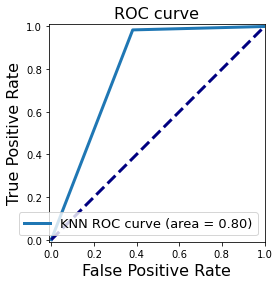

In [48]:
fpr_lr, tpr_lr, _ = roc_curve(Y_test, test_predictions)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='KNN ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


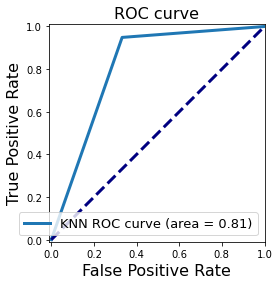

In [49]:
fpr_lr, tpr_lr, _ = roc_curve(Y_test, test_predictions_poly)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='KNN ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()